In [8]:
# Install extra libraries (silent mode)
!pip install -q seaborn plotly

# Import Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# For file upload in Google Colab
from google.colab import files
import io

# Set plot style
sns.set_style("whitegrid")


In [9]:
# Prompt user to upload file
print("📁 Please upload your car dataset CSV file")
uploaded = files.upload()

# Read uploaded CSV file
df = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))

# Display the first few rows
df.head()


📁 Please upload your car dataset CSV file


Saving car data.csv to car data (1).csv


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
# Print dataset shape and column names
print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())

# Clean column names: remove spaces and lowercase them
df.columns = df.columns.str.strip().str.lower()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop rows with missing values (if any)
df.dropna(inplace=True)

# Show data types
df.info()


Dataset shape: (301, 9)
Column names: ['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']

Missing values:
 car_name         0
year             0
selling_price    0
present_price    0
driven_kms       0
fuel_type        0
selling_type     0
transmission     0
owner            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       301 non-null    object 
 1   year           301 non-null    int64  
 2   selling_price  301 non-null    float64
 3   present_price  301 non-null    float64
 4   driven_kms     301 non-null    int64  
 5   fuel_type      301 non-null    object 
 6   selling_type   301 non-null    object 
 7   transmission   301 non-null    object 
 8   owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory us

In [11]:
# Display unique values in object (categorical) columns
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()}")

# Apply Label Encoding to categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Preview encoded dataset
df.head()


car_name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'H

,car_name,year,selling_price,present_price,driven_kms,fuel_type,selling_type,transmission,owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0


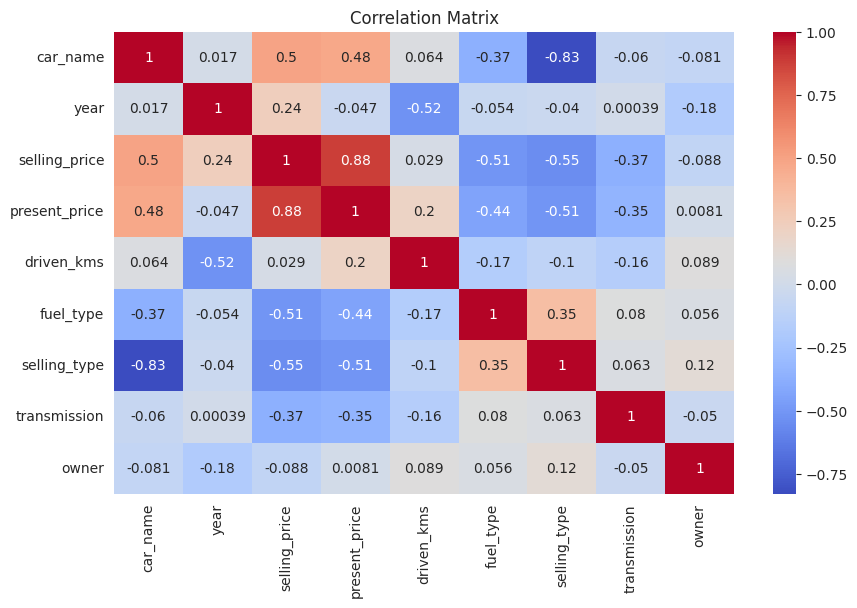

In [12]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [13]:
# Choose your target column (check your dataset for actual name)
# Common names: 'selling_price', 'price', etc.
target_col = 'selling_price'  # Change if your dataset uses a different name

# Ensure target column exists
if target_col not in df.columns:
    raise ValueError(f"❌ Column '{target_col}' not found. Available columns: {df.columns.tolist()}")

# Split into features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

📉 Mean Squared Error: 3.54
📊 R² Score: 0.85


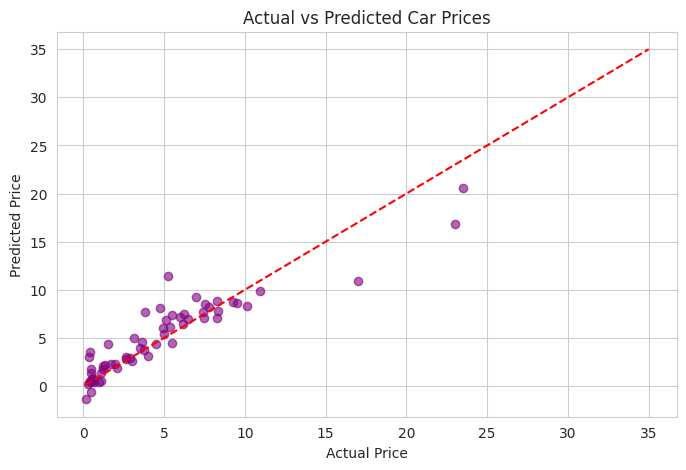

In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 Mean Squared Error: {mse:.2f}")
print(f"📊 R² Score: {r2:.2f}")

# Visual comparison
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.grid(True)
plt.show()


In [15]:
!pip install -q ipywidgets
import ipywidgets as widgets
from IPython.display import display


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.8 MB/s eta 0:00:00


In [16]:
# Build input widgets for each feature column
input_widgets = {}
for col in X.columns:
    if len(df[col].unique()) <= 10:
        # Use dropdown for categorical/small unique columns
        input_widgets[col] = widgets.Dropdown(
            options=sorted(df[col].unique()),
            description=col,
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='50%')
        )
    else:
        # Use float input for numeric columns
        input_widgets[col] = widgets.FloatText(
            description=col,
            style={'description_width': 'initial'},
            layout=widgets.Layout(width='50%')
        )

# Display all widgets
input_form = widgets.VBox(list(input_widgets.values()))
display(input_form)


In [17]:
# Button to trigger prediction
predict_button = widgets.Button(description="Predict Car Price", button_style='success')

# Output area
output_area = widgets.Output()

# Prediction function
def predict_price(b):
    with output_area:
        output_area.clear_output()

        # Collect input values into DataFrame
        input_data = pd.DataFrame({col: [widget.value] for col, widget in input_widgets.items()})

        # Scale the input using same scaler
        input_scaled = scaler.transform(input_data)

        # Predict using the trained model
        predicted_price = model.predict(input_scaled)[0]

        print(f"💰 Estimated Car Price: {predicted_price:,.2f}")

# Bind function to button
predict_button.on_click(predict_price)

# Show button and output
display(predict_button, output_area)


Button(button_style='success', description='Predict Car Price', style=ButtonStyle())

Output()